In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataSet = np.array([[0, 0],[1, 0],[2, 0],[0, 1],[1, 1],[2, 1],[3, 1], [4, 1],[5, 1],[100, 1],[0, 2],[1, 2],[2, 2],[3, 2],
                    [4, 2],[5, 2],[100, 2],[3, 3],[4, 3],[5, 3],[100, 3]])

In [11]:
points = np.asarray(list(map(lambda x : [1, x[0],x[1]], dataSet)))
points
X = points

In [7]:
output_data = []

for i in range(0,len(points)):
    if(points[i][2]  <= 2):
        output_data.append((1,0))
    else:
        output_data.append((0,1))
output_data = np.array(output_data)

In [10]:
rows, count = np.unique(output_data, axis = 0, return_counts = 1)
output_freq = {tuple(i):j for i,j in zip(rows, count)}
output_freq

{(0, 1): 4, (1, 0): 17}

In [22]:
a = np.matmul(X.T,X)
b = np.linalg.inv(a)
c = np.matmul(b,X.T)
d = np.matmul(c, output_data) 

w = d
w
w[0]

array([ 1.27964245, -0.27964245])

In [23]:
w

array([[ 1.27964245e+00, -2.79642450e-01],
       [-2.05868000e-04,  2.05868000e-04],
       [-2.97014152e-01,  2.97014152e-01]])

In [19]:
predictions = np.zeros(21)
accuracy = 0
for i in range(0,len(X)):
    y1 = w[:,0][0] * 1 + w[:,0][1] * X[i][1] + w[:,0][2] * X[i][2]
    y2 = w[:,1][0] * 1 + w[:,1][1] * X[i][1] + w[:,1][2] * X[i][2]
    
    if(y1 > y2):
        predictions[i] = 1
        print("C1")
    else:
        predictions[i] = 0
        print("C2")
    if(predictions[i] == output_data[i][0]):
        accuracy += 1
print(accuracy)
accuracy = accuracy/len(output_data)
accuracy*100

C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C2
C2
C2
C2
21


100.0

In [24]:
print("{0} + {1}x1 + {2}x2".format(w[0][0]-w[0][1] , w[1][0] - w[1][1], w[2][0] - w[2][1]))

1.5592849009800334 + -0.0004117360009759668x1 + -0.5940283030376967x2


In [27]:
c1 = np.asarray(list(filter(lambda x : x[1] <=2 , dataSet)))
c2 = np.asarray(list(filter(lambda x : x[1] > 2, dataSet)))
c1.shape

(17, 2)

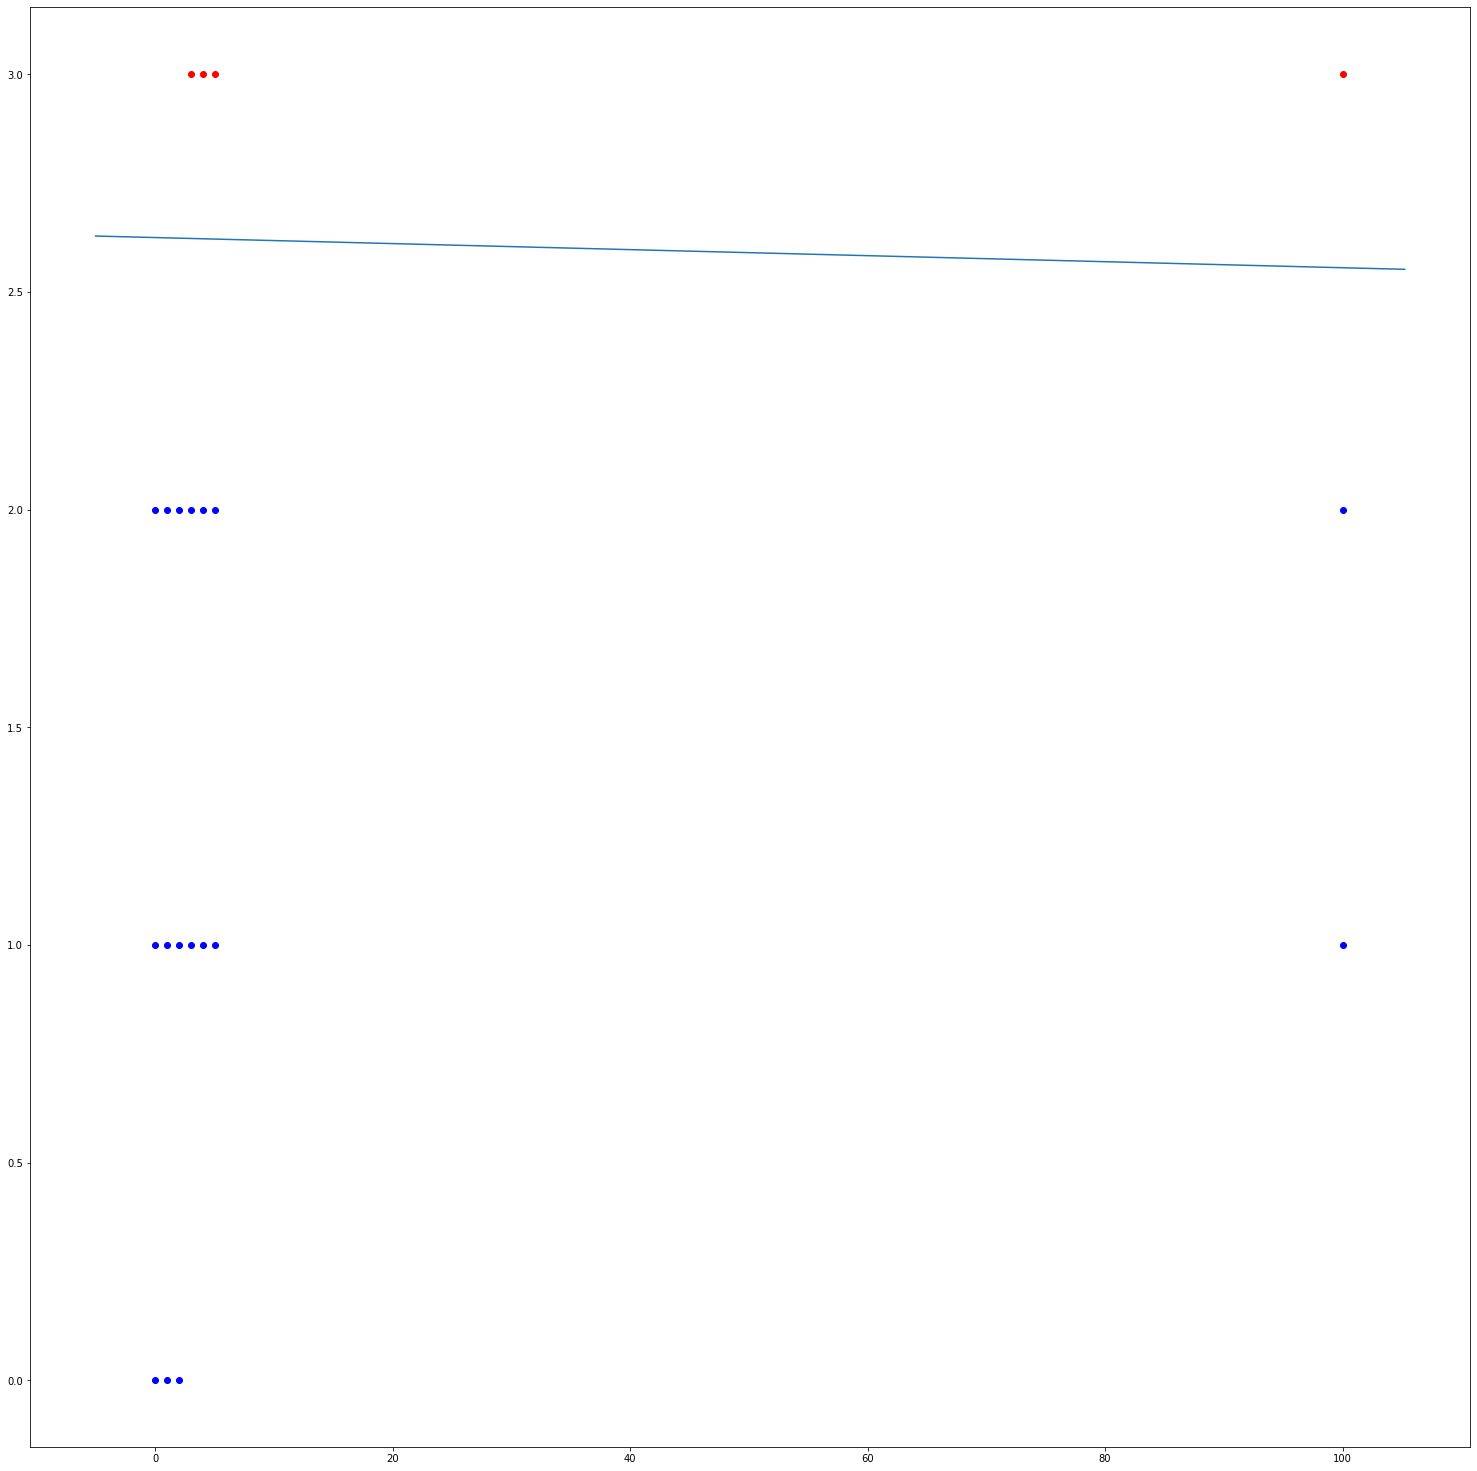

In [31]:
# Source: https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
def abline(slope=-0.0004117360009759668/0.5940283030376967, intercept=1.5592849009800334/0.5940283030376967):
    """Plot a line from slope and intercept"""
#     axes = plot.gca()
    
    figure = plt.figure(figsize=(20, 20))
    axes= figure.add_axes([0,0,1,1])
    axes.scatter(c1[:, 0], c1[:, 1], color="blue")
    axes.scatter(c2[:, 0], c2[:, 1], color="red")
    
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')
    plt.show()
abline()